**Project** : Mini Spiro Mask

step 1: Import dependencies

In [30]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter
from scipy.signal import lfilter
import scipy.io

Step 2 :load the audio file into the 'librosa' module for calculating the sampling_rate of the audio.


In [32]:
filename = '/content/Breath Audio 5.mp3'
audio, sampling_rate = librosa.load(filename, sr=None)


In [33]:
sampling_rate

44100

**Conclusion step-2:** we conclude that the sampling rate of given audio is **44.1K Hertz**


**Step 3 : Calculate FFT (Fast Fourier Transform)**

**What is FFT?**
- FFT stands for Fast Fourier Transform , used to convert the audio signal from time domain to frequency domain. enabling analysis and visualization of their frequency components, aiding tasks such as identifying pitch, harmonics, and noises.

**Why  FFT?**
- As we FFT is used to transform signals from the **time domain to frequency domain**.
- Using FFT we can determined **different frequecies** present in the signal.
- Also, FFT provide convenient way to visualize the frequency content of an audio. It can create **Frequency Spectrum** that shows the distribution of frequencies and their magnitude in the audio.

**How FFT is useful for our project?**
- We used the FFt to analyze the frequency content of the recorded breath audio,This can help in identifying any higher frequencies present in the audio, which might correspond to noise or unwanted components.
- Which might be helpful to answer our 2nd question which is "**How we Filtering out the Higher frequency using any tool?"**

In [34]:
# Calculate FFT
fft_result = np.fft.fft(audio)
frequencies = np.fft.fftfreq(len(audio),1 / sampling_rate)

**Step 4 : Ploting FFT**

- **Visualization** provides insights into which frequencies are present in the signal and their relative magnitude
- Using FFT plot, we can identify dominant Frequency components in the audio signal, helps in determining the pitch of a sound and identifying noise or interference.

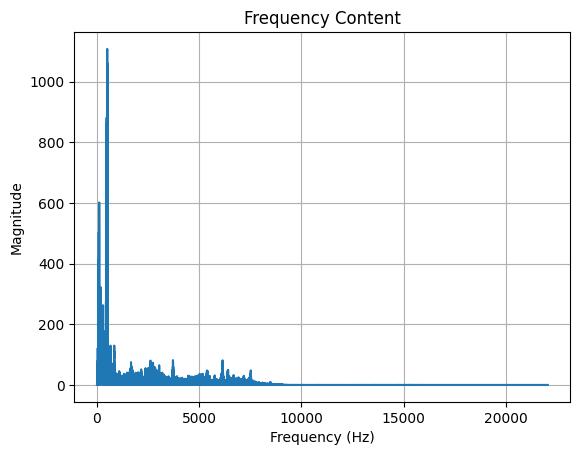

In [35]:
# plot FFT
plt.figure()
plt.plot(frequencies[:len(frequencies) // 2], np.abs(fft_result[:len(frequencies) // 2])) # len(frequencies) // 2 because Fourier series is symmertical
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Content")
plt.title("Frequency Content")
plt.grid(True)
plt.show()

3rd Question i.e. **"In what frequency range is the breathing information present?"**

Answer to this question is:  **0 - 1000 Hz** Frequencies as

   - **0-200 Hz**: This range is fundamental frequency of breathing, which is the rate at which our **lungs inflate and deflate.**

   - **200-500 Hz**: This range may contain information about the **upper airways**, such as the trachea and bronchi.

   - **500-1000 Hz**: This range may contain information about the **flow of air through the smaller airways.**
  
Any **Frequencies > 1000 Hz** are generally considerd to be **higher frequencies** in breath sounds.

In [36]:
# Filter Higher Frequencies
Threshold_frequency = 1000
order = 5

# Design high pass filter
def butter_highpass(Threshold_frequency, fs, order = 5):

  nyq = 0.5 * fs  # Calculate Nyquist Frequency, which is half of sampling frequency
  normal_threshold = Threshold_frequency / nyq  # This normalize the cutoff or threshold frequency
  # by dividing it by Nyquist frequency, as it neccessary for designing digital frequecny

  b, a = butter(order, normal_threshold, btype = 'high', analog = False)
  return b, a


# Applying the high pass filter
b,a = butter_highpass(Threshold_frequency, sampling_rate, order)
filtered_audio = lfilter(b,a,audio)


Saved the filtered audio

In [40]:
scipy.io.wavfile.write('filtered_breath_audio_5.wav',sampling_rate, filtered_audio)

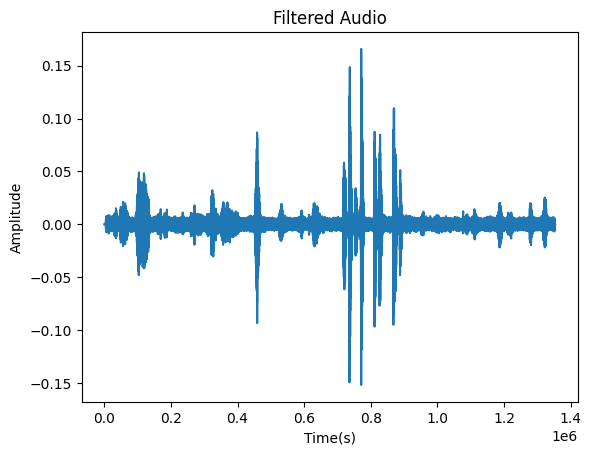

In [38]:
plt.figure()
plt.plot(filtered_audio)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Filtered Audio')
plt.show()

In [39]:
!pip show librosa


Name: librosa
Version: 0.10.1
Summary: Python module for audio and music processing
Home-page: https://librosa.org
Author: Brian McFee, librosa development team
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: /usr/local/lib/python3.10/dist-packages
Requires: audioread, decorator, joblib, lazy-loader, msgpack, numba, numpy, pooch, scikit-learn, scipy, soundfile, soxr, typing-extensions
Required-by: 


In [29]:
!pip install librosa --upgrade